# Movie Genre Analysis: Popularity, Ratings, Budget, and Revenue Insights


## Introduction

This project focuses on an in-depth analysis of movie genres to understand
their impact on production trends, audience engagement, and financial
performance. By examining genre-level data, the analysis aims to identify
patterns related to movie frequency, popularity, ratings, and revenue outcomes.

The following sections outline the key questions and hypotheses guiding the
analysis.


### Research Questions: 

1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. budget and revenue?
3. Which genres have high avg. popularity?
4. Which genres have highest number of movies with an voting avg. >=8?

### Research Hypotheses: 

1. The best movies according to vote avg. return high profit and revenue.
2. The best movies according to popularity return high profit and revenue.
3. Highly budgeted movies return high revenue and profit.
4. Highly budgeted movies have a high popularity.


In [136]:
import pandas as pd

movies = pd.read_csv(r'C:\Users\jnv26\Downloads\imdb_movies (1).csv')

In [139]:
movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800


In [141]:
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 25)

In [129]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [144]:
movies.drop_duplicates(inplace = True)

In [145]:
movies.dropna(subset = ['genres'], inplace = True)

In [146]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date       

In [147]:
movies['profit'] = movies['revenue'] - movies['budget']

In [209]:
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_year','vote_count','vote_average','profit']]

In [210]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,2947,7.300000,1316249360


In [152]:
from pandas import Series, DataFrame

In [211]:
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

In [212]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action


### Research Questions (Q): 

1. Which genres are the most common (number of movies made)?


In [160]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = True)

In [161]:
genres_count

,original_title
genres_split,
Western,163
TV Movie,167
Foreign,188
War,269
History,331
Music,403
Documentary,520
Animation,697
Mystery,796


<AxesSubplot:title={'center':'Movies Per Genre in %'}, ylabel='original_title'>

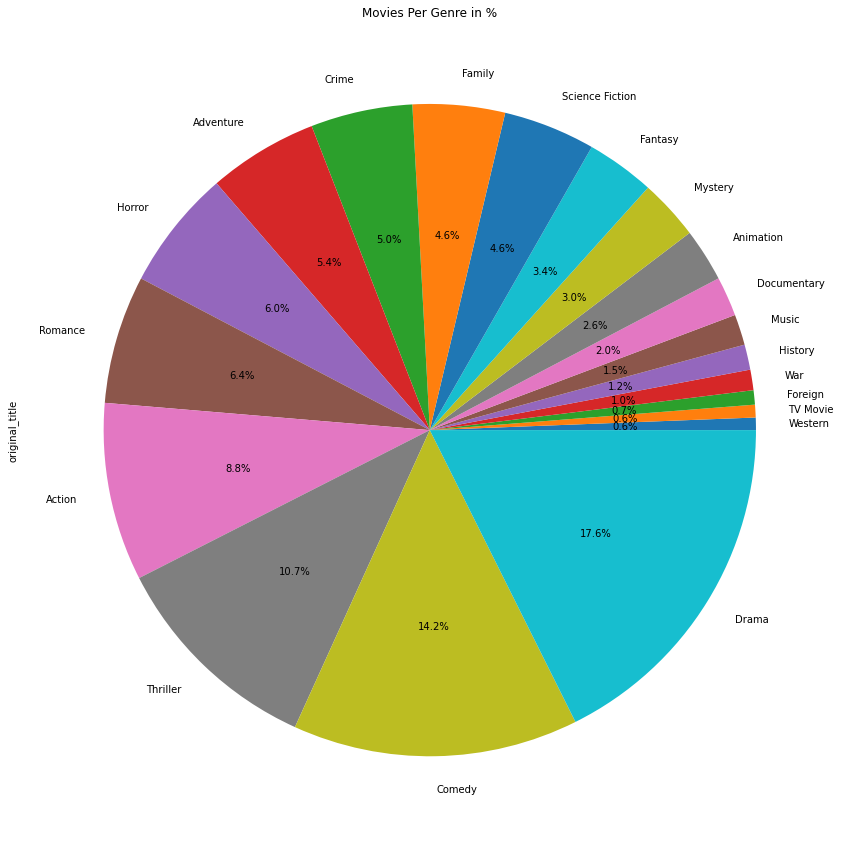

In [162]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct= '%1.1f%%', figsize = (15,15))

<AxesSubplot:title={'center':'Movies Per Genre'}, ylabel='genres_split'>

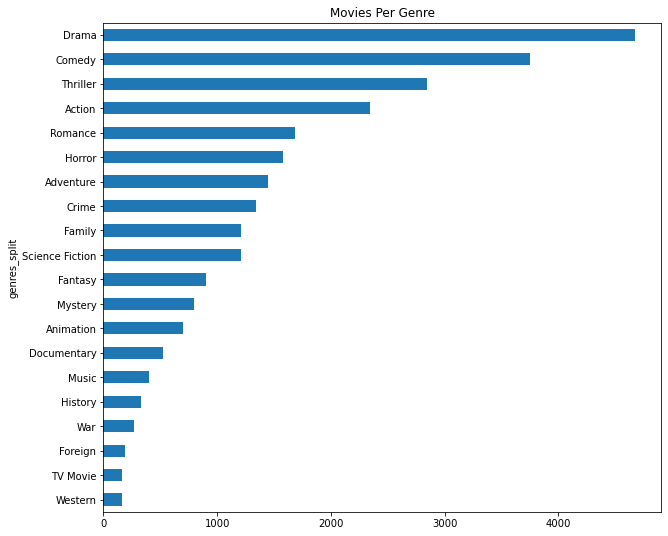

In [163]:
genres_count['original_title'].plot.barh(title = 'Movies Per Genre',figsize = (10,9))

#### 2. Which genres have high avg. budget and revenue?

In [164]:
genres_avg = movies_genre.groupby('genres_split').mean()

pd.options.display.float_format = '{:2f}'.format

genres_avg

,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit
genres_split,,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,2000.056208,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,1999.388851,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,2003.995708,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,2000.816240,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,1999.491137,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,2008.313462,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,2000.929202,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,2000.774167,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,2000.292576,420.741266,5.863537,63701071.733624


In [165]:
genres_avg.sort_values('revenue', ascending = True, inplace = True)

<AxesSubplot:title={'center':'Budget and Revenue by Genre'}, ylabel='genres_split'>

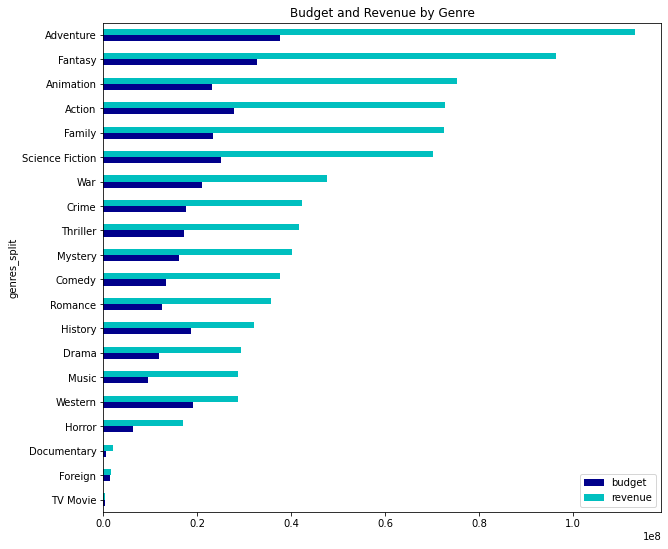

In [166]:
genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue','c'),figsize = (10,9))

In [ ]:
# 2.5 Which genres have high avg. Profit?

In [167]:
genres_avg

,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit
genres_split,,,,,,,,
TV Movie,0.270896,267664.670659,251497.005988,91.982036,2004.634731,34.365269,5.788024,-16167.664671
Foreign,0.191496,1451434.925532,1520459.835106,107.228723,2001.398936,16.627660,5.981383,69024.909574
Documentary,0.181432,577149.148077,2041106.994231,102.651923,2008.313462,35.105769,6.908462,1463957.846154
Horror,0.465357,6226529.210751,16822808.624313,94.424557,2001.117288,120.059866,5.337447,10596279.413561
Western,0.590615,18974107.975758,28568709.284848,117.575758,1986.915152,205.739394,6.083030,9594601.309091
Music,0.487321,9438627.549020,28571768.691176,105.137255,2000.196078,124.340686,6.480392,19133141.142157
Drama,0.591495,11880717.773529,29232255.725840,110.478151,2000.929202,182.544538,6.165546,17351537.952311
History,0.575936,18594919.302395,32011793.215569,136.206587,1997.497006,183.772455,6.410479,13416873.913174
Romance,0.592082,12531271.847547,35691972.327103,106.891355,2000.438668,166.070678,6.042874,23160700.479556


In [174]:
genres_avg.sort_values('profit', ascending = True, inplace = True)

<AxesSubplot:title={'center':'Profit by Genre'}, ylabel='genres_split'>

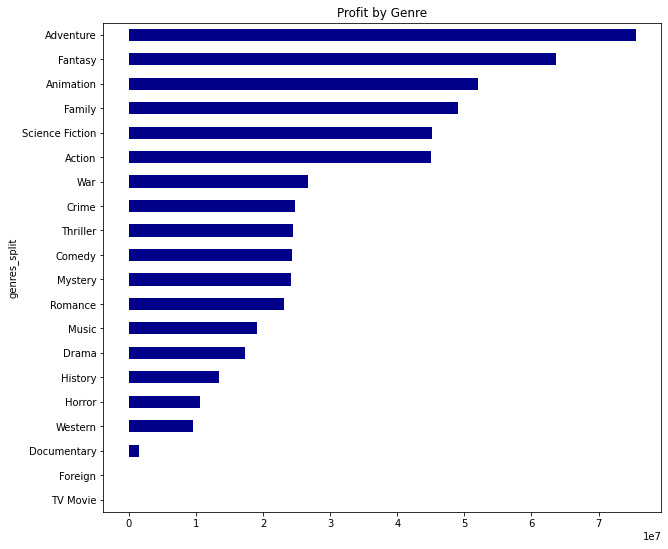

In [175]:
genres_avg['profit'].plot.barh(title = 'Profit by Genre', color = 'DarkBlue',figsize = (10,9))

In [176]:
movies.sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
9894,4939,tt0058571,0.294102,0,0,Send Me No Flowers,Rock Hudson|Doris Day|Tony Randall|Clint Walke...,NaN,Norman Jewison,"Rock is ready to make love yesterday, tomorrow...",hypochondriac,"At one of his many visits to his doctor, hypoc...",100,Comedy|Romance,Universal Pictures,10/14/64,13,4.800000,1964,0.000000,0.000000,0
9223,6951,tt0098536,0.480969,0,71079915,Turner & Hooch,Tom Hanks|Mare Winningham|Craig T. Nelson|Scot...,NaN,Roger Spottiswoode,The Oddest Couple Ever Unleashed!,eating non food|pet food,Scott Turner has 3 days left in the local poli...,100,Action|Comedy|Thriller|Crime|Family,Silver Screen Partners III|Touchstone Pictures,7/28/89,172,5.900000,1989,0.000000,125028499.953474,71079915
10169,29756,tt0053559,0.110511,0,0,13 Ghosts,Charles Herbert|Jo Morrow|Martin Milner|Rosema...,NaN,William Castle,IT'S FUN TO BE SCARED BY 13 GHOSTS,haunted house,Reclusive Dr. Zorba has died and left his mans...,85,Horror,Columbia Pictures|William Castle Productions,8/5/60,12,5.500000,1960,0.000000,0.000000,0


### 3. Which genres have high avg. popularity?

In [177]:
genres_avg

,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit
genres_split,,,,,,,,
TV Movie,0.270896,267664.670659,251497.005988,91.982036,2004.634731,34.365269,5.788024,-16167.664671
Foreign,0.191496,1451434.925532,1520459.835106,107.228723,2001.398936,16.627660,5.981383,69024.909574
Documentary,0.181432,577149.148077,2041106.994231,102.651923,2008.313462,35.105769,6.908462,1463957.846154
Western,0.590615,18974107.975758,28568709.284848,117.575758,1986.915152,205.739394,6.083030,9594601.309091
Horror,0.465357,6226529.210751,16822808.624313,94.424557,2001.117288,120.059866,5.337447,10596279.413561
History,0.575936,18594919.302395,32011793.215569,136.206587,1997.497006,183.772455,6.410479,13416873.913174
Drama,0.591495,11880717.773529,29232255.725840,110.478151,2000.929202,182.544538,6.165546,17351537.952311
Music,0.487321,9438627.549020,28571768.691176,105.137255,2000.196078,124.340686,6.480392,19133141.142157
Romance,0.592082,12531271.847547,35691972.327103,106.891355,2000.438668,166.070678,6.042874,23160700.479556


In [178]:
genres_avg.sort_values('popularity', ascending = True, inplace = True)

<AxesSubplot:title={'center':'Popularity by Genre'}, ylabel='genres_split'>

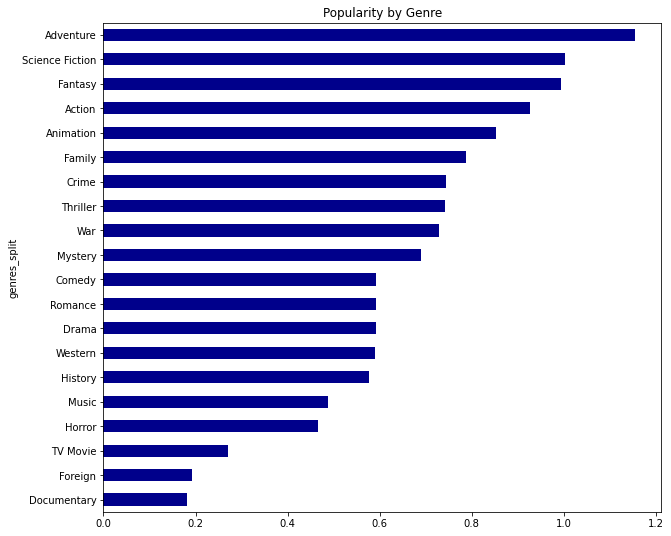

In [179]:
genres_avg['popularity'].plot.barh(title = 'Popularity by Genre', color = 'DarkBlue',figsize = (10,9))

### 4. Which genres have highest number of movies with an voting avg. >=8?

In [180]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_date,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,2015,6185,7.100000,228436354,Action


In [186]:
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_zero = movies_genre[movies_genre['vote_average'] >= 8]

In [187]:
genres_vote = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)

In [188]:
genres_vote

,vote_average
genres_split,
Family,1
Action,2
Mystery,2
History,2
Fantasy,2
Adventure,2
War,2
Horror,3
Romance,3


In [189]:
genres_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)

In [190]:
genres_vote

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


<AxesSubplot:title={'center':'Vote Average by Genre'}, xlabel='genres_split'>

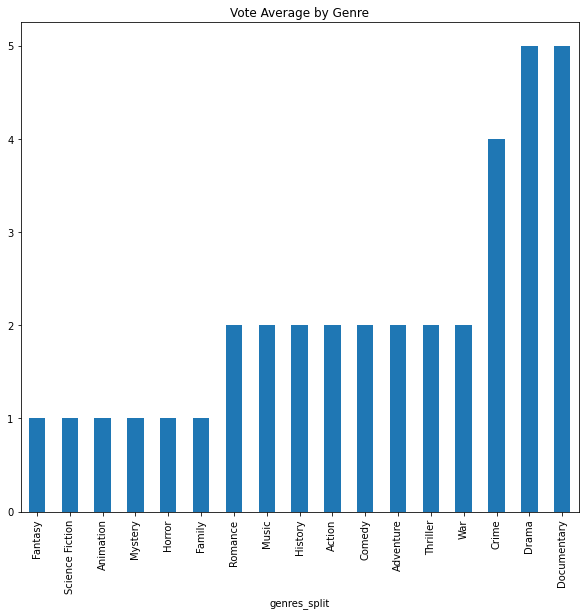

In [191]:
genres_vote['vote_average'].plot.bar(title = 'Vote Average by Genre',figsize = (10,9))

## Research Hypotheses (H): 

### 1. The best movies according to vote avg. return high profit and revenue.



In [192]:
movies.drop_duplicates(inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]

In [194]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


In [195]:
movies_counted = movies_genre[movies_genre['vote_count'] >= 50]

movies_counted.corr(method = 'spearman')

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


<AxesSubplot:xlabel='vote_average', ylabel='revenue'>

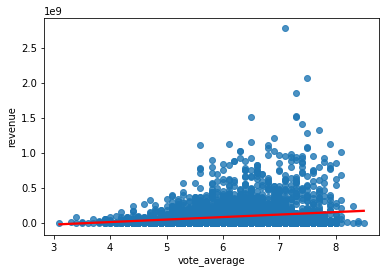

In [69]:
import seaborn as sns

sns.regplot(x = 'vote_average', y = 'revenue', data = movies_counted, line_kws = {"color": 'red'})

### 2. The best movies according to popularity return high profit and revenue.

In [71]:
movies_counted.corr(method = 'spearman')

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


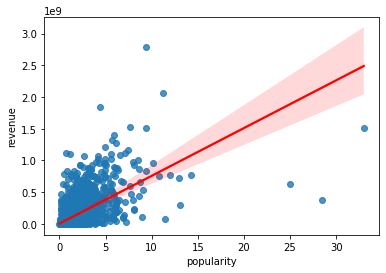

<Figure size 720x360 with 0 Axes>

In [196]:
import matplotlib.pyplot as plt
sns.regplot(x = 'popularity', y = 'revenue', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,5))
plt.show()

### 3. Highly budgeted movies return high revenue and profit.

In [204]:
movies_counted.sample()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
1466,0.965516,39000000,101229792,The Time Traveler's Wife,107,Drama|Romance|Fantasy,8/14/09,478,6.500000,62229792


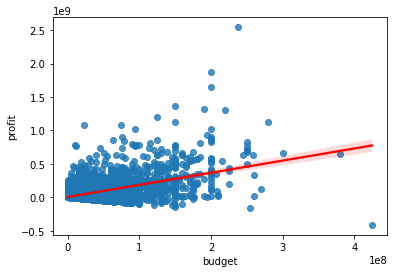

<Figure size 720x360 with 0 Axes>

In [205]:
sns.regplot(x = 'budget', y = 'profit', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,5))
plt.show()

### 4. Highly budgeted movies have a high popularity.

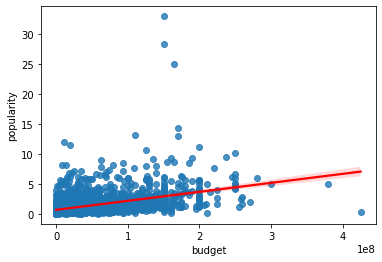

<Figure size 720x360 with 0 Axes>

In [206]:
sns.regplot(x = 'budget', y = 'popularity', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,5))
plt.show()

#### 5. Look at Profit Per Genre Per Year

In [214]:
movies_genre.sample(3)

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
9688,0.200760,6000000,42721196,Mannequin,89,1987,61,5.600000,36721196,Fantasy
7912,0.603541,14400000,34700291,The Killing Fields,141,1984,78,7.200000,20300291,War
1562,0.529160,10000000,42333295,The Fourth Kind,98,2009,244,5.600000,32333295,Science Fiction


In [215]:
time_genre = pd.DataFrame(movies_genre.groupby(['release_year','genres_split'])['profit'].mean())

In [216]:
final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])

Text(0.5, 1.0, 'Genres by Profit per Year')

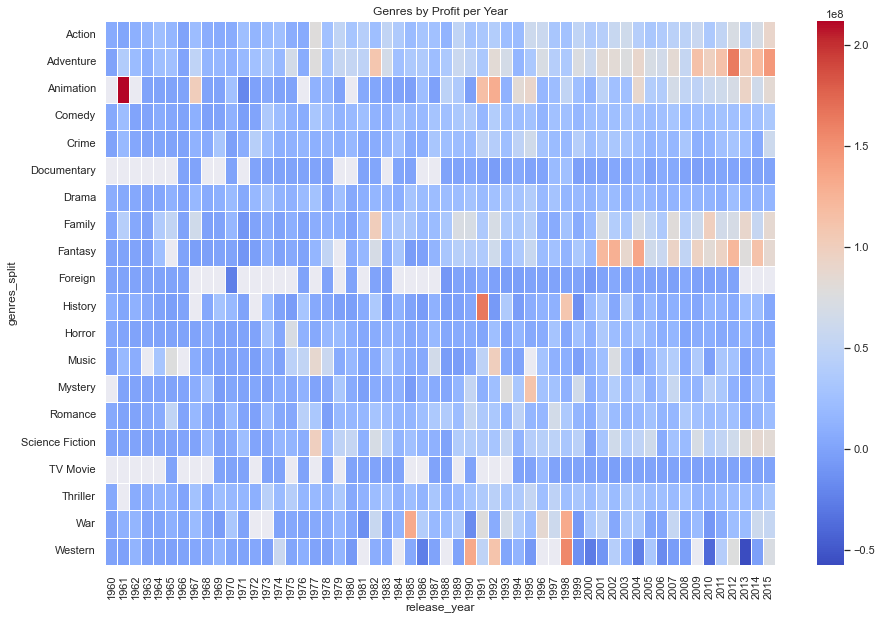

In [217]:
sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(final_genre, cmap = 'coolwarm', linewidths = .5)
plt.title('Genres by Profit per Year')